# Поиск места бурение скважины 

## Введение 

### Задание

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных 

- **id** — уникальный идентификатор скважины
- **f0**, **f1**, **f2** — три признака точек (неважно, что они означают, но сами признаки значимы)
- **product** — объём запасов в скважине (тыс. баррелей)

## Подключение библиотек 

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Загрузка и подготовка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Подготовка geo_data_0

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
len(geo_data_0['id'].unique())

99990

Видно что поле id содержит множество уникальных значений и, кроме того, по смыслу не может влиять на прибыль

In [6]:
geo_data_0 = geo_data_0.drop('id', axis=1)

In [7]:
def print_boxplot(data):
    for name in ['f0','f1', 'f2','product']:
        _, ax = plt.subplots(figsize=(10,6))
        ax.set_title('Признак ' + name)
        sns.boxplot(data=geo_data_0, x=name)
        ax.set_xlabel('Количество ' + name)
        ax.set_ylabel(name)
        plt.show()

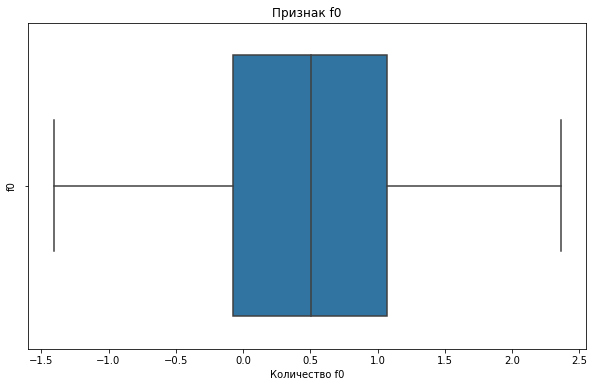

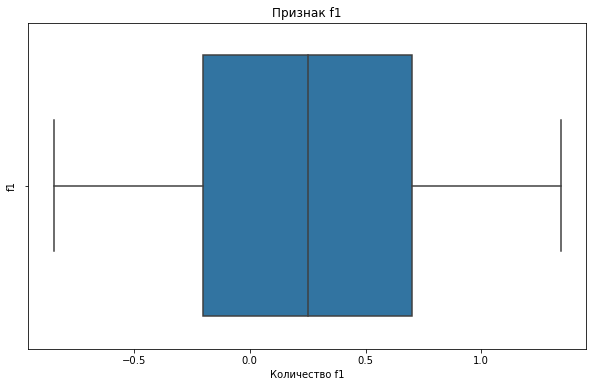

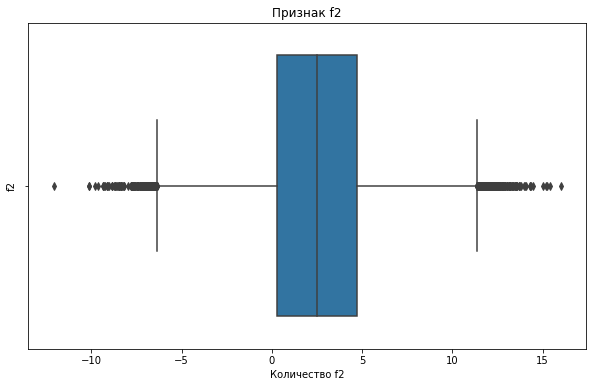

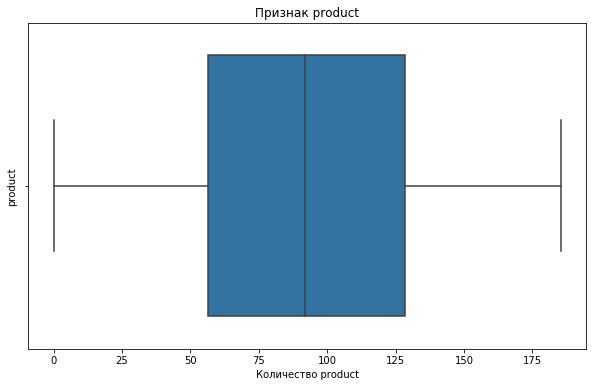

In [8]:
print_boxplot(geo_data_0)

In [9]:
def print_histplot(data):
    for name in ['f0','f1', 'f2','product']:
        _, ax = plt.subplots(figsize=(10,6))
        ax.set_title('Признак ' + name)
        sns.histplot(data=data, x=name)
        ax.set_xlabel('Количество ' + name)
        ax.set_ylabel(name)
        plt.show()

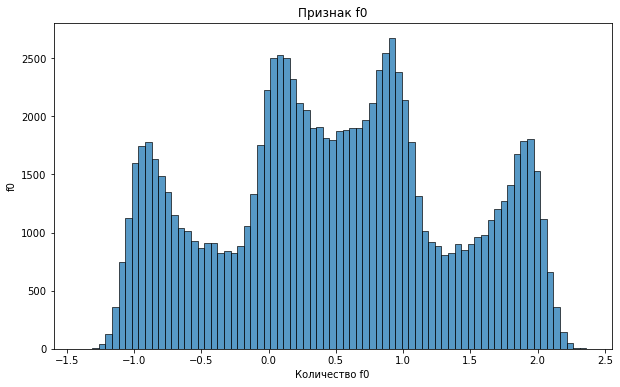

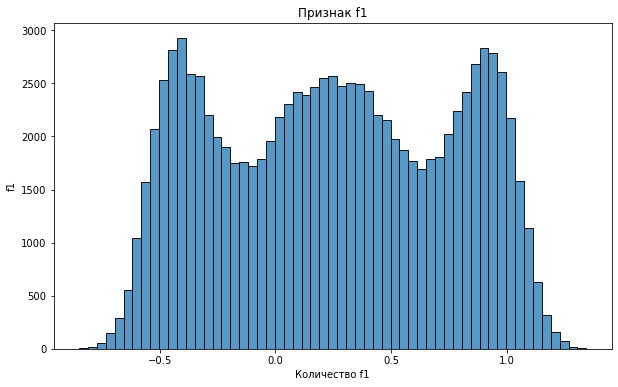

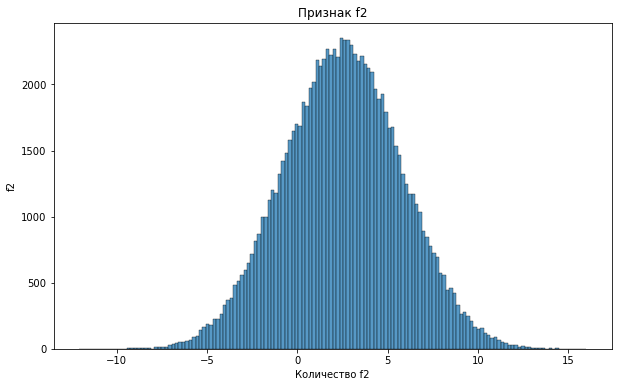

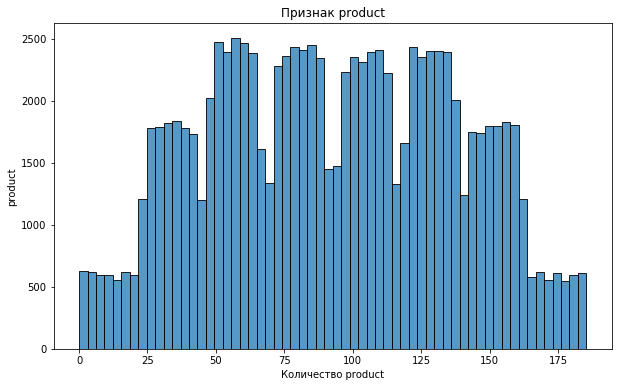

In [10]:
print_histplot(geo_data_0)

#### Вывод

Выбросы содержаться только в признаки f2, но так как их много и они расположены с обоих сторон, не будем их удалять. Также примем в расчет, что наши данные синтетические 

### Подготовка geo_data_1

In [11]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
len(geo_data_1['id'].unique())

99996

Видно что поле id содержит множество уникальных значений и, кроме того, по смыслу не может влиять на прибыль

In [14]:
geo_data_1 = geo_data_1.drop('id', axis=1)

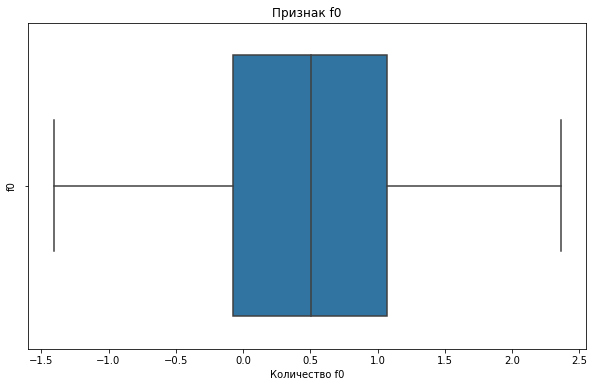

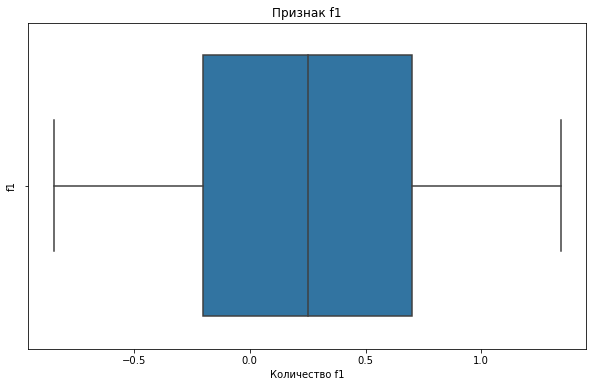

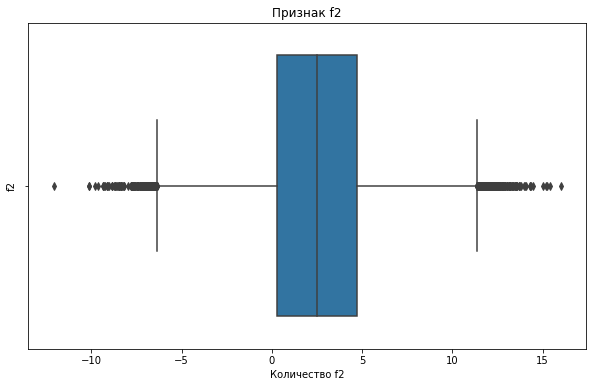

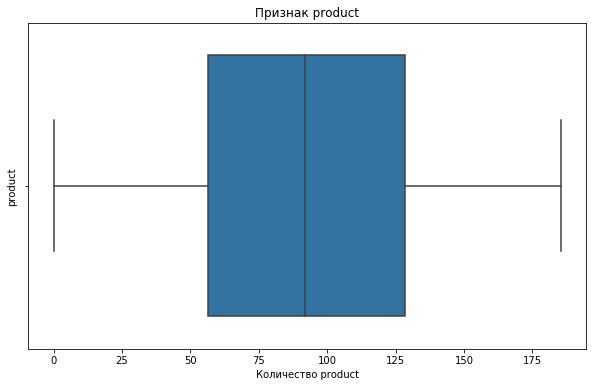

In [15]:
print_boxplot(geo_data_1)

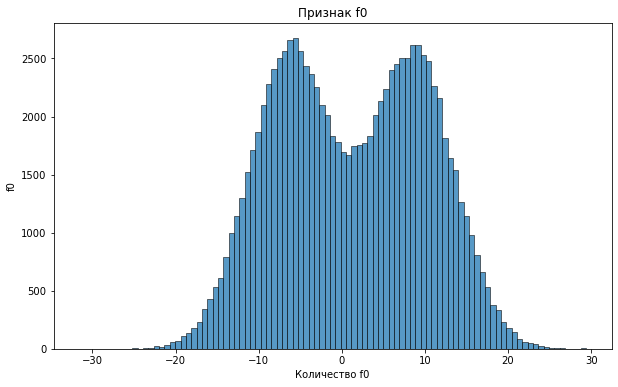

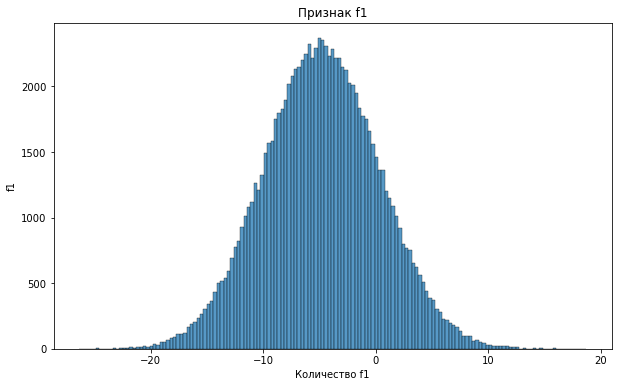

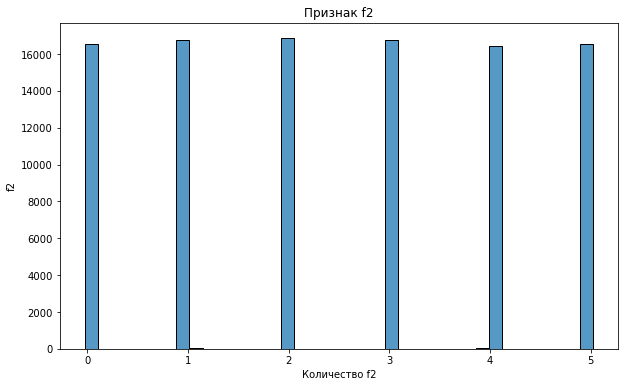

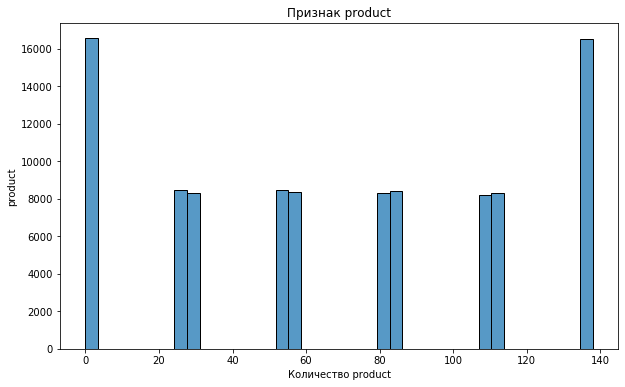

In [16]:
print_histplot(geo_data_1)

#### Вывод

Выбросы содержаться только в признаки f2, но так как их много и они расположены с обоих сторон, не будем их удалять. Также примем в расчет, что наши данные синтетические 

### Подготовка geo_data_2

In [17]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [18]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [19]:
len(geo_data_2['id'].unique())

99996

Видно что поле id содержит множество уникальных значений и, кроме того, по смыслу не может влиять на прибыль

In [20]:
geo_data_2 = geo_data_2.drop('id', axis=1)

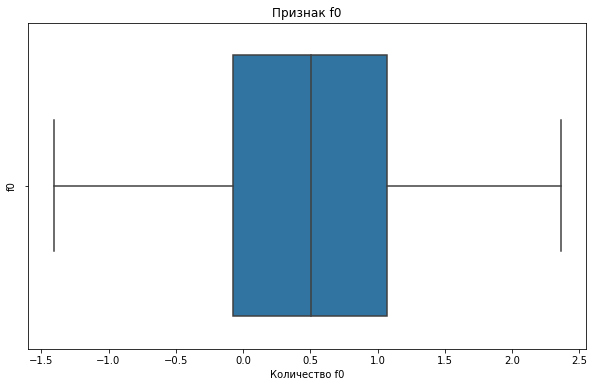

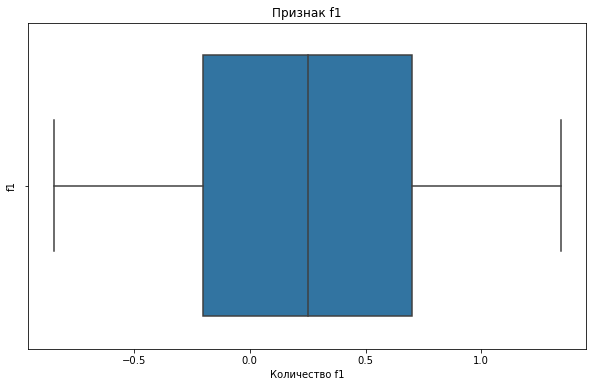

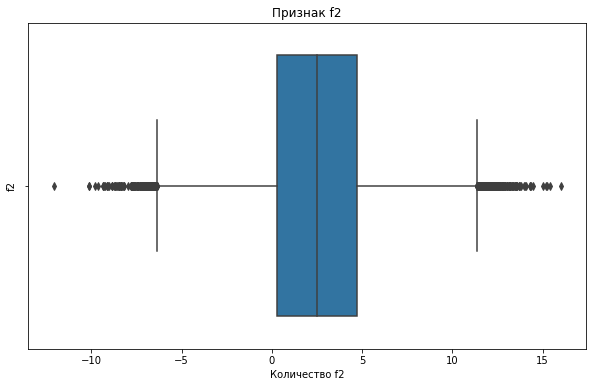

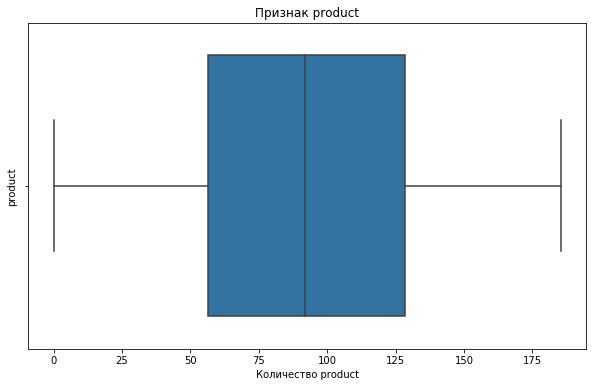

In [21]:
print_boxplot(geo_data_2)

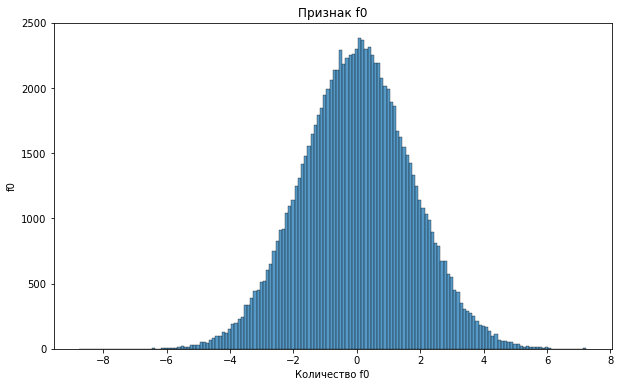

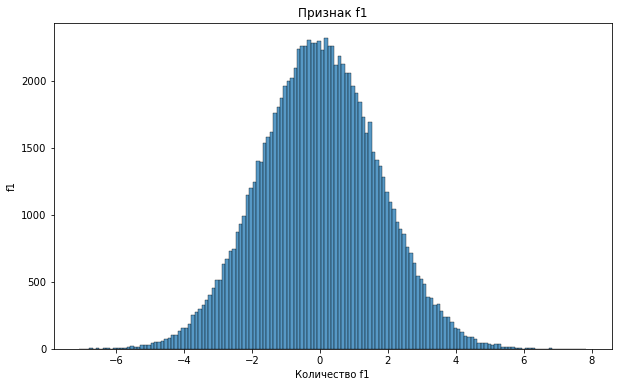

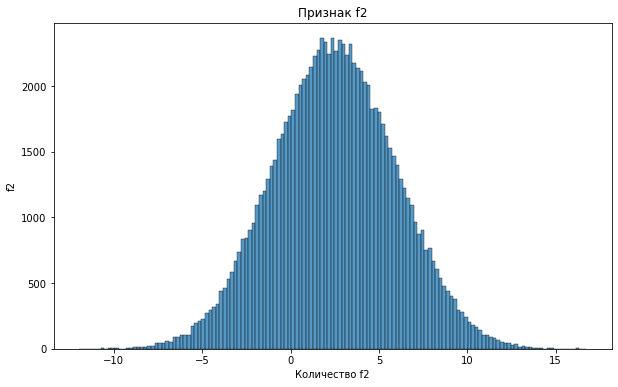

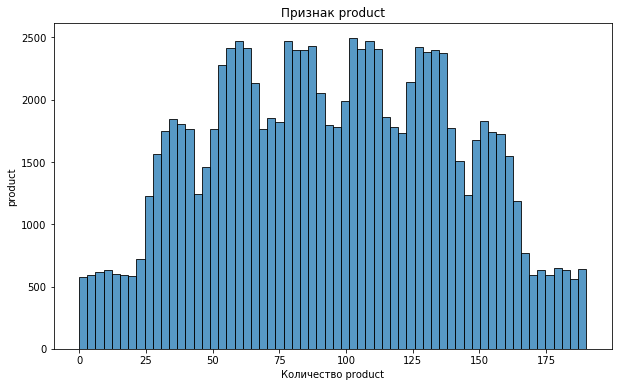

In [22]:
print_histplot(geo_data_2)

#### Вывод

Выбросы содержаться только в признаки f2, но так как их много и они расположены с обоих сторон, не будем их удалять. Также примем в расчет, что наши данные синтетические 

## Обучение и проверка модели

In [23]:
def split_x_y(data, column):
    x = data.drop(column, axis=1)
    y = data[column]
    return x, y

In [24]:
def my_train_test_split(data):
    df_train, df_test = train_test_split(data, test_size=0.25, random_state=12345)
    
    df_train_x, df_train_y = split_x_y(df_train,'product')
    df_test_x, df_test_y = split_x_y(df_test,'product')
    
    return df_train_x, df_train_y, df_test_x, df_test_y

### Модель для geo_data_0

In [28]:
geo0_train_x, geo0_train_y, geo0_test_x, geo0_test_y = my_train_test_split(geo_data_0)

In [29]:
geo0_model = LinearRegression()

In [37]:
geo0_model.fit(geo0_train_x, geo0_train_y)

LinearRegression()

In [38]:
predicted_valid = geo0_model.predict(geo0_test_x)

In [39]:
mse = mean_squared_error(geo0_test_y, predicted_valid)
RMSE = mse ** 0.5

In [40]:
RMSE

37.5794217150813

# 3. Подготовка к расчёту прибыли

# 4. Функция для расчёта прибыли

# 5. Расчёт прибыли и рисков 

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован